In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("laser_scan.ipynb")

# Instructions

This assignment checks your laser scan to twist command logic. All the code is in laser_scan.py Once you've completed these functions you can copy them into your driver.py code.

Slides:

See the ROS 2 assignments for go and stop versus go around descriptions.

For all of this assignment, the data files we're reading in are created by calling

*ros2 node echo topic:base_scan --once > scan.txt*

while the robot is running around. So you can use this JN on your own scans later, if you want.

A reminder that the scan consists of a list of distances, with additional information about the start/stop angle. The scan is always in the coordinate system of the robot, not the world --- i.e., the scan starting point is 0,0, and the angles go from -theta to theta (i.e., 1,0 is the direction of the center scan).



In [2]:
# The usual
import matplotlib.pyplot as pyplt

# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

## Detect an obstacle in front of you

The goal of this part of the code is to determine the closest object in **front** of the robot. The robot has a width; a point is in front of the robot if it would hit that point if it drove forward. This is indicated by the dashed green lines. 

In [3]:
from laser_scan import LaserScan, get_twist_values, plot_robot, plot_scan, plot_twist, label_scan

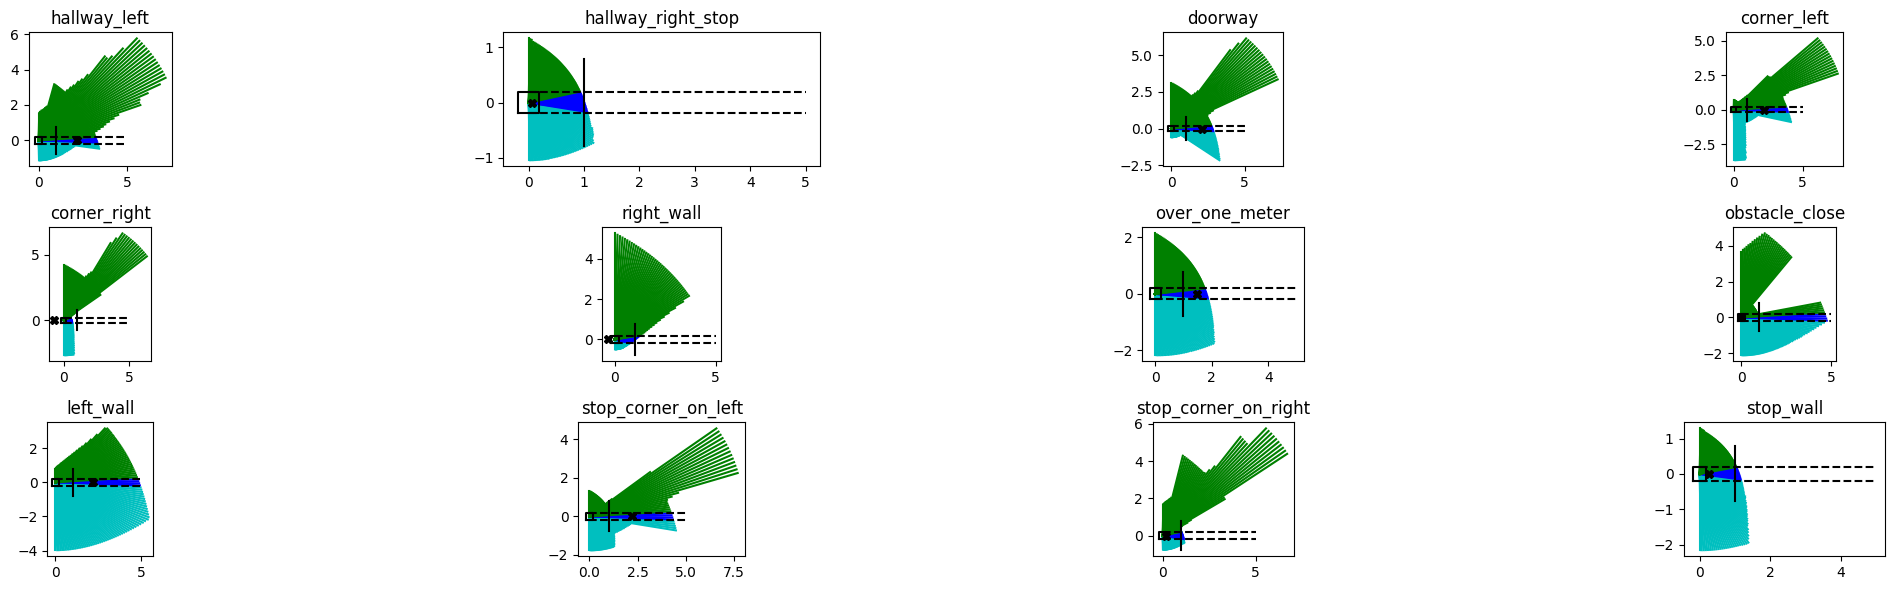

In [4]:
robot_width = 0.39
stopping_distance = 1.0

# You can change this/add more/take some away. Just make
# sure nrows * ncols > length of names
names = ["hallway_left", "hallway_right_stop", "doorway",
            "corner_left", "corner_right", "right_wall", 
            "over_one_meter", "obstacle_close", "left_wall",
            "stop_corner_on_left", "stop_corner_on_right", "stop_wall"]

nrows = 3
ncols = 4
fig, axs = pyplt.subplots(nrows, ncols, figsize=(ncols*6, 6))

for indx, n in enumerate(names):
    r = indx // ncols
    c = indx % ncols
    scan = LaserScan("Data/" + n + ".txt")
    labels = label_scan(scan=scan)
    twist = get_twist_values(scan=scan, robot_width=robot_width, stopping_distance=stopping_distance)

    ax = axs[r, c]
    plot_scan(axs=ax, scan=scan, optional_labels=labels)
    plot_robot(axs=ax, robot_width=robot_width, stopping_distance=stopping_distance)
    plot_twist(axs=ax, twist=twist, robot_width=robot_width)
    ax.set_title(n)

fig.tight_layout()
pyplt.show()

In [5]:
scan_short = LaserScan("Data/hallway_right_stop.txt")
scan_just_right = LaserScan("Data/stop_wall.txt")
scan_long = LaserScan("Data/over_one_meter.txt")
scan_doorway = LaserScan("Data/doorway.txt")
twist_short = get_twist_values(scan=scan_short, robot_width=robot_width, stopping_distance=stopping_distance)
twist_just_right = get_twist_values(scan=scan_just_right, robot_width=robot_width, stopping_distance=stopping_distance)
twist_long = get_twist_values(scan=scan_long, robot_width=robot_width, stopping_distance=stopping_distance)
twist_doorway = get_twist_values(scan=scan_doorway, robot_width=robot_width, stopping_distance=stopping_distance)
assert twist_short[0] < 0.0
assert twist_long[0] > 0.1
assert abs(twist_just_right[0]) < 0.1
assert twist_doorway[0] > twist_long[0]

twist_diff_ds = []
for indx, stopping_dist in enumerate([0.5, 1.0, 1.5]):
    twist_diff_dist = get_twist_values(scan=scan_just_right, robot_width=robot_width, stopping_distance=stopping_dist)
    twist_diff_ds.append(twist_diff_dist[0])

assert twist_diff_ds[2] < 0.0
assert abs(twist_diff_ds[1]) < 0.1
assert twist_diff_ds[0] > twist_diff_ds[1]

In [6]:
grader.check("detect_front")

detect_front results: All test cases passed!

### To submit

- Do a restart then run all to make sure everything runs ok
- Save the file
- Submit this .ipynb file and the laser_scan.py file through gradescope, Laser scan assignment
- Take out/suppress all print statements

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

